In [0]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
manuf_data = pd.read_csv('https://www.dropbox.com/s/75wp00500bbw7zm/MNFCTRIRNSA.csv?dl=1')

# Remove NA's
manuf_data.dropna(inplace=True)

In [58]:
manuf_data.head()

,DATE,MNFCTRIRNSA
0,1992-01-01,1.79
1,1992-02-01,1.63
2,1992-03-01,1.51
3,1992-04-01,1.58
4,1992-05-01,1.56


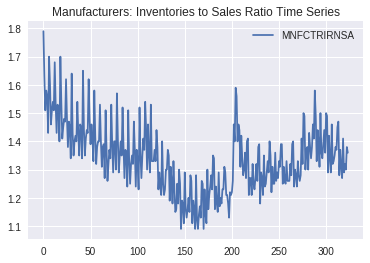

In [59]:
manuf_data.plot()
plt.title('Manufacturers: Inventories to Sales Ratio Time Series')
plt.show()

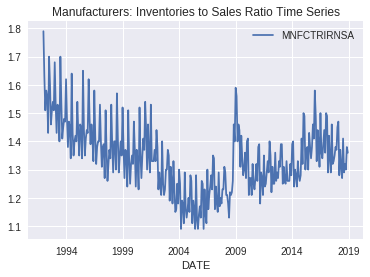

In [60]:
manuf_data.index = pd.to_datetime(manuf_data.DATE)
manuf_data.plot()
plt.title('Manufacturers: Inventories to Sales Ratio Time Series')
plt.show()

Needs to be stationary

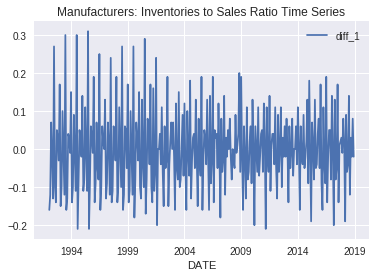

In [61]:
manuf_data['diff_1'] = manuf_data.MNFCTRIRNSA - manuf_data.MNFCTRIRNSA.shift()
manuf_data.plot(y='diff_1')
plt.title('Manufacturers: Inventories to Sales Ratio Time Series')
plt.show()

Text(0.5, 1.0, 'Manufacturing PACF')

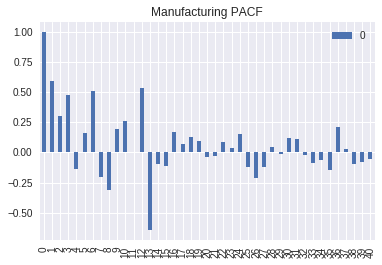

In [62]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(manuf_data.MNFCTRIRNSA))
x_acf.plot(kind='bar')
plt.title("Manufacturing PACF")

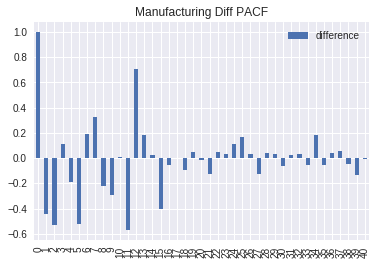

In [63]:
x_acf = pd.DataFrame(pacf(manuf_data.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("Manufacturing Diff PACF")
plt.legend(['difference'])

                              ARMA Model Results                              
Dep. Variable:            MNFCTRIRNSA   No. Observations:                  324
Model:                     ARMA(1, 0)   Log Likelihood                 295.359
Method:                       css-mle   S.D. of innovations              0.097
Date:                Mon, 18 Mar 2019   AIC                           -584.719
Time:                        18:19:05   BIC                           -573.376
Sample:                    01-01-1992   HQIC                          -580.191
                         - 12-01-2018                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.3448      0.014     97.271      0.000       1.318       1.372
ar.L1.MNFCTRIRNSA     0.6112      0.045     13.511      0.000       0.523       0.700
                        

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5, 1.0, '1,0,0 Histogram of Residuals')

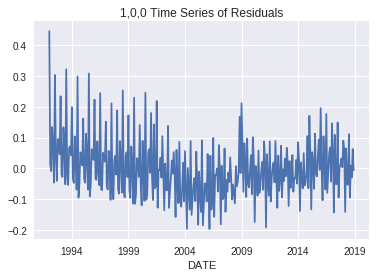

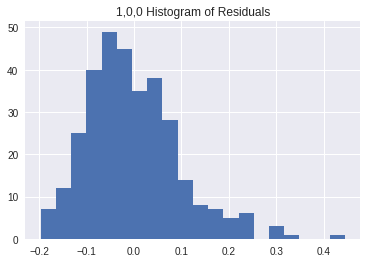

In [64]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(manuf_data.MNFCTRIRNSA, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

residuals = pd.DataFrame(model_fit.resid)

residuals.plot(legend=False)
plt.title('1,0,0 Time Series of Residuals')

residuals.hist(bins=20)
plt.title('1,0,0 Histogram of Residuals')

                             ARIMA Model Results                              
Dep. Variable:          D.MNFCTRIRNSA   No. Observations:                  323
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 297.423
Method:                       css-mle   S.D. of innovations              0.096
Date:                Mon, 18 Mar 2019   AIC                           -588.847
Time:                        18:19:05   BIC                           -577.514
Sample:                    02-01-1992   HQIC                          -584.323
                         - 12-01-2018                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0012      0.004     -0.313      0.754      -0.008       0.006
ar.L1.D.MNFCTRIRNSA    -0.4471      0.050     -8.974      0.000      -0.545      -0.349
                

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5, 1.0, '1,1,0 Histogram of Residuals')

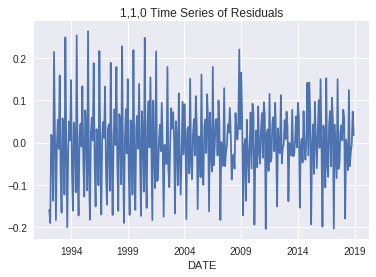

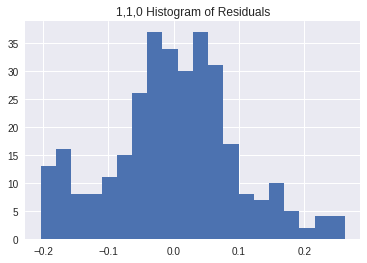

In [65]:
from statsmodels.tsa.arima_model import ARIMA
model_1 = ARIMA(manuf_data.MNFCTRIRNSA, order=(1,1,0))
model_1_fit = model_1.fit()
print(model_1_fit.summary())
print('Residuals Description')
print(model_1_fit.resid.describe())

residuals_1 = pd.DataFrame(model_1_fit.resid)

residuals_1.plot(legend=False)
plt.title('1,1,0 Time Series of Residuals')

residuals_1.hist(bins=20)
plt.title('1,1,0 Histogram of Residuals')

                              ARMA Model Results                              
Dep. Variable:            MNFCTRIRNSA   No. Observations:                  324
Model:                     ARMA(0, 1)   Log Likelihood                 273.542
Method:                       css-mle   S.D. of innovations              0.104
Date:                Mon, 18 Mar 2019   AIC                           -541.084
Time:                        18:19:06   BIC                           -529.742
Sample:                    01-01-1992   HQIC                          -536.557
                         - 12-01-2018                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.3430      0.009    151.969      0.000       1.326       1.360
ma.L1.MNFCTRIRNSA     0.5318      0.044     12.128      0.000       0.446       0.618
                        

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5, 1.0, '0,1,1 Histogram of Residuals')

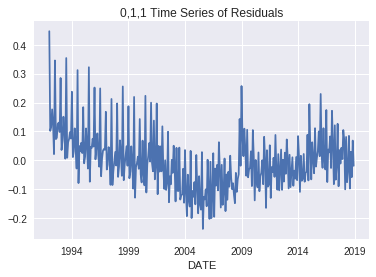

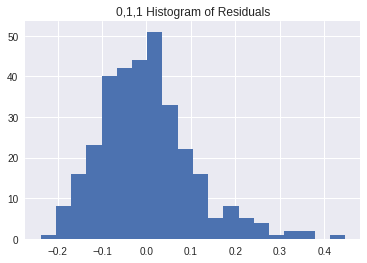

In [66]:
from statsmodels.tsa.arima_model import ARIMA
model_2 = ARIMA(manuf_data.MNFCTRIRNSA, order=(0,0,1))
model_2_fit = model_2.fit()
print(model_2_fit.summary())
print('Residuals Description')
print(model_2_fit.resid.describe())

residuals_2 = pd.DataFrame(model_2_fit.resid)

residuals_2.plot(legend=False)
plt.title('0,1,1 Time Series of Residuals')

residuals_2.hist(bins=20)
plt.title('0,1,1 Histogram of Residuals')

                             ARIMA Model Results                              
Dep. Variable:          D.MNFCTRIRNSA   No. Observations:                  323
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 344.194
Method:                       css-mle   S.D. of innovations              0.083
Date:                Mon, 18 Mar 2019   AIC                           -682.387
Time:                        18:19:07   BIC                           -671.054
Sample:                    02-01-1992   HQIC                          -677.863
                         - 12-01-2018                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0008      0.001     -0.946      0.345      -0.002       0.001
ma.L1.D.MNFCTRIRNSA    -0.8177      0.032    -25.408      0.000      -0.881      -0.755
                

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5, 1.0, '0,1,1 Histogram of Residuals')

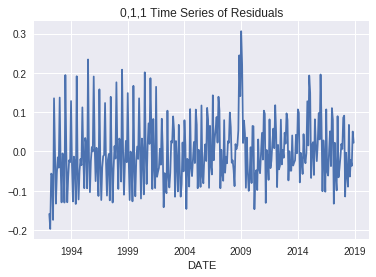

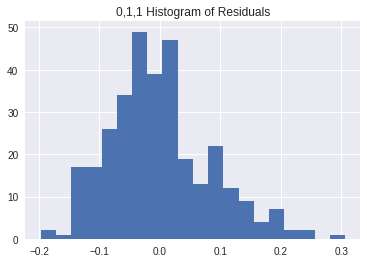

In [67]:
from statsmodels.tsa.arima_model import ARIMA
model_3 = ARIMA(manuf_data.MNFCTRIRNSA, order=(0,1,1))
model_3_fit = model_3.fit()
print(model_3_fit.summary())
print('Residuals Description')
print(model_3_fit.resid.describe())

residuals_3 = pd.DataFrame(model_3_fit.resid)

residuals_3.plot(legend=False)
plt.title('0,1,1 Time Series of Residuals')

residuals_3.hist(bins=20)
plt.title('0,1,1 Histogram of Residuals')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


                             ARIMA Model Results                              
Dep. Variable:          D.MNFCTRIRNSA   No. Observations:                  323
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 344.220
Method:                       css-mle   S.D. of innovations              0.083
Date:                Mon, 18 Mar 2019   AIC                           -680.439
Time:                        18:19:07   BIC                           -665.329
Sample:                    02-01-1992   HQIC                          -674.407
                         - 12-01-2018                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0008      0.001     -0.939      0.349      -0.003       0.001
ar.L1.D.MNFCTRIRNSA    -0.0156      0.068     -0.229      0.819      -0.149       0.118
ma.L1.D.MNFCTRIR

Text(0.5, 1.0, '1,1,1 Histogram of Residuals')

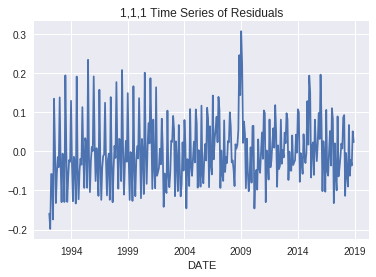

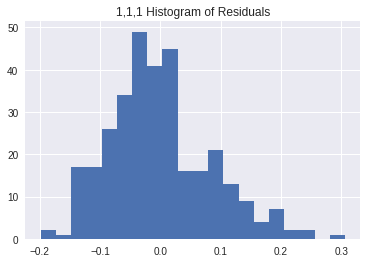

In [68]:
from statsmodels.tsa.arima_model import ARIMA
model_4 = ARIMA(manuf_data.MNFCTRIRNSA, order=(1,1,1))
model_4_fit = model_4.fit()
print(model_4_fit.summary())
print('Residuals Description')
print(model_4_fit.resid.describe())

residuals_4 = pd.DataFrame(model_4_fit.resid)

residuals_4.plot(legend=False)
plt.title('1,1,1 Time Series of Residuals')

residuals_4.hist(bins=20)
plt.title('1,1,1 Histogram of Residuals')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Converg

                             ARIMA Model Results                              
Dep. Variable:          D.MNFCTRIRNSA   No. Observations:                  323
Model:                 ARIMA(5, 1, 5)   Log Likelihood                 487.517
Method:                       css-mle   S.D. of innovations              0.052
Date:                Mon, 18 Mar 2019   AIC                           -951.035
Time:                        18:19:12   BIC                           -905.703
Sample:                    02-01-1992   HQIC                          -932.939
                         - 12-01-2018                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0008      0.002     -0.346      0.729      -0.005       0.004
ar.L1.D.MNFCTRIRNSA    -1.0030      0.014    -74.081      0.000      -1.030      -0.976
ar.L2.D.MNFCTRIR

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.MNFCTRIRNSA   No. Observations:                  323
Model:                 ARIMA(5, 1, 5)   Log Likelihood                 487.517
Method:                       css-mle   S.D. of innovations              0.052
Date:                Mon, 18 Mar 2019   AIC                           -951.035
Time:                        18:19:16   BIC                           -905.703
Sample:                    02-01-1992   HQIC                          -932.939
                         - 12-01-2018                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0008      0.002     -0.346      0.729      -0.005       0.004
ar.L1.D.MNFCTRIRNSA    -1.0030      0.014    -74.081      0.000      -1.030      -0.976
ar.L2.D.MNFCTRIR

Text(0.5, 1.0, '5,1,5 Histogram of Residuals')

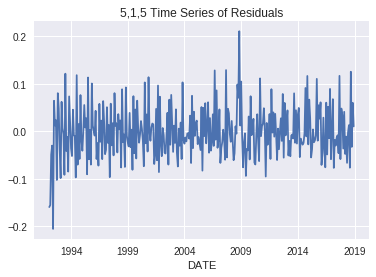

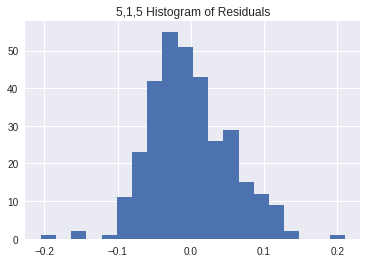

In [69]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(manuf_data.MNFCTRIRNSA, order=(5,1,5))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

from statsmodels.tsa.arima_model import ARIMA
model_5 = ARIMA(manuf_data.MNFCTRIRNSA, order=(5,1,5))
model_5_fit = model_5.fit()
print(model_5_fit.summary())
print('Residuals Description')
print(model_5_fit.resid.describe())

residuals_5 = pd.DataFrame(model_5_fit.resid)

residuals_5.plot(legend=False)
plt.title('5,1,5 Time Series of Residuals')

residuals_5.hist(bins=20)
plt.title('5,1,5 Histogram of Residuals')

Our (5,1,5) model is random and normally distributed with its risiduals, and has the lowest AIC value of -951. Thus, we will choose this model for our data. 